# Feature selection Techniques

This notebook consists in detailing the most appropriate features according to different feature selection techniques

## Filter Methods 

Calculate the correlations between the features and target attributes

### Divide of features into two categories 
    - Categorical features (Nominal): albumin - sugar - red_blood_cells  - pus_cell  - pus_cell_clumps  - bacteria  - hypertension  - diabetes_mellitus  - coronary_artery_disease  - appetite  - peda_edema  - aanemia  
 
    - Numearical features (Ordinal) : age  - blood_pressure  - specific_gravity    - blood_glucose_random  - blood_urea  - serum_creatinine  - sodium  - potassium  - hemoglobin  - packed_cell_volume  - white_blood_cell_count  - red_blood_cell_count
    

To divide them, we checked the values in the dataset of each feature and the meaning behind it 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math
from sklearn.model_selection import train_test_split

In [2]:
correlation_numfeature_numfeature=0.7
correlation_catfeature_catfeature=0.7
correlation_numfeature_catfeature=0.7
correlation_target_numfeature=0.2
correlation_target_catfeature=0.2
important_num_features=[]
important_cat_features=[]
how_to_divide_features_num_cat='default' 
#  It can also be: automatically / or the user can enter: manually.
threshold_unique_values_tobe_cat_feature=5

## List of personalized functions used in this notebook:

In [3]:
def numberOfLigne(numberGraphe,numberOfColumn):
    return int(math.ceil(numberGraphe/numberOfColumn))


In [4]:
def detect_correlated_feature_feature(mask,list_important_feature,corr):

    # will be used for plotting high_corr_pairs and selected_pairs
    high_corr_pairs = np.where(mask)
    selected_pairs = [(list_important_feature[i], list_important_feature[j]) for i, j in zip(*high_corr_pairs) if i != j]

    strongly_correlated_features = corr[mask].stack().dropna().reset_index()
    
    
    return  strongly_correlated_features, selected_pairs

In [5]:
def delete_correlated_feature(strongly_correlated_features,important_features):
    deleted_features=[]
    for f in important_features:
    
        if f not in deleted_features:
            df=strongly_correlated_features[strongly_correlated_features['level_0']==f]
    
            mask = np.isin(important_features, df['level_1'].values)
               
       
            
            deleted_features=np.concatenate((deleted_features, important_features[mask]), axis=0).copy()
            
    mask = np.isin(important_features, deleted_features)
   
    important_features=important_num_features[~mask]
    
    return important_features,deleted_features


In [6]:
def transform_unique_paris(selected_pairs):
    unique_pairs = set()
    for pair in selected_pairs:
    
        sorted_pair = tuple(sorted(pair))
        unique_pairs.add(sorted_pair)


    unique_pairs_list = list(unique_pairs)
    return unique_pairs_list

In [7]:
def features_num_cat_manually(columns , target , cat_features,num_features):
    for col in columns:
        if( col != target):
            while True:
                    print(f'Enter the type of feature {col} by writing cat or num:')
                    type_feature = input()
                    if type_feature== 'cat' or type_feature=='num':
                        break
            if type_feature=='cat':
                cat_features.append(col)
            else:
                num_features.append(col)

In [8]:
def features_num_cat_automatically(columns , target , cat_features,num_features,Threshold):
    for col in clean_df:
        if( col != target):
            if len(clean_df[col].unique()) <= Threshold:
                cat_features.append(col)
            else:
                num_features.append(col)

In [9]:
def get_name_target(columns):
    while True:
        print('Donner le nom de la target')
        target = input()
        if target in columns:
            break
    return target

In [10]:
clean_df = pd.read_csv(r'Data/clean_dataset.csv')
clean_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,-0.311111,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.307692,-0.060606,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-2.133333,-3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.343750,...,-0.153846,-0.606061,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.311111,0.0,-1.0,1.0,3.0,0.0,0.0,0.0,0.0,4.718750,...,-0.692308,-0.151515,0.066667,0.0,1.0,0.0,-1.0,0.0,1.0,0.0
3,-0.311111,-1.0,-1.5,2.0,0.0,0.0,-1.0,1.0,0.0,-0.062500,...,-0.615385,-0.393939,-0.600000,1.0,0.0,0.0,-1.0,1.0,1.0,0.0
4,-0.177778,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.234375,...,-0.384615,-0.212121,-0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
cat_features=[]
num_features=[]
if how_to_divide_features_num_cat=='manually':
    target=get_name_target(clean_df.columns)
    features_num_cat_manually(clean_df.columns , target , cat_features,num_features) 
elif how_to_divide_features_num_cat=='automatically':
    target=get_name_target(clean_df.columns)
    features_num_cat_automatically(clean_df.columns , target , cat_features,num_features,threshold_unique_values_tobe_cat_feature)
else:
    target='classification'
    
    num_features=['age'  ,
              'blood_pressure'  ,
              'specific_gravity'    ,
              'blood_glucose_random'  ,
              'blood_urea'  ,
              'serum_creatinine'  ,
              'sodium'  ,
              'potassium'  ,
              'hemoglobin'  ,
              'packed_cell_volume',
              'white_blood_cell_count'  ,
              'red_blood_cell_count']
    
    cat_features=['albumin' ,
              'sugar' ,
              'red_blood_cells'  ,
              'pus_cell'  ,
              'pus_cell_clumps'  ,
              'bacteria'  ,
              'hypertension'   ,
              'diabetes_mellitus'  ,
              'coronary_artery_disease'  ,
              'appetite'   ,
              'peda_edema'  ,
              'aanemia']

In [12]:
cat_features

['albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [13]:
num_features

['age',
 'blood_pressure',
 'specific_gravity',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [14]:
target

'classification'

In [15]:
all_features = np.concatenate((cat_features, num_features), axis=0)
all_features

array(['albumin', 'sugar', 'red_blood_cells', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'age', 'blood_pressure', 'specific_gravity',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count'], dtype='<U23')

### Variance test
The objective of this test is to determine the constants in the project

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
selector = VarianceThreshold(threshold = 0)
selector.fit(clean_df)

print(selector.get_support())

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]


In [18]:
# select the name of columns that are constant value false
columns_to_delete =clean_df.columns[np.logical_not(selector.get_support())]

print(columns_to_delete)

clean_df = clean_df.drop(columns=columns_to_delete)

clean_df.head()

Index([], dtype='object')


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,-0.311111,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.307692,-0.060606,0.266667,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-2.133333,-3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,-0.343750,...,-0.153846,-0.606061,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.311111,0.0,-1.0,1.0,3.0,0.0,0.0,0.0,0.0,4.718750,...,-0.692308,-0.151515,0.066667,0.0,1.0,0.0,-1.0,0.0,1.0,0.0
3,-0.311111,-1.0,-1.5,2.0,0.0,0.0,-1.0,1.0,0.0,-0.062500,...,-0.615385,-0.393939,-0.600000,1.0,0.0,0.0,-1.0,1.0,1.0,0.0
4,-0.177778,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.234375,...,-0.384615,-0.212121,-0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
print('conclusion')
if len(columns_to_delete) ==0:
    print('There is no constant in the project')
else :
    print('columns deleted : ',columns_to_delete)

conclusion
There is no constant in the project


### Correlation between numerical features and  the target (categorical variable) 

In [20]:
corr=[]
for feature in num_features:
    pb_corr, pb_p_value = stats.pointbiserialr(   # Used between a binary categorical variable and numerical one
        clean_df[feature],
        clean_df[target])
    corr.append([feature,abs(pb_corr)])
corr=pd.DataFrame(corr,columns=['num_feature','correlation with the target'])

display(corr.sort_values(by='correlation with the target'  ,ascending=False))

features=corr[corr['correlation with the target']>correlation_target_numfeature].sort_values(by='correlation with the target'  ,ascending=False)


important_num_features=  features['num_feature'].values.copy() 




,num_feature,correlation with the target
8,hemoglobin,0.733923
2,specific_gravity,0.713634
9,packed_cell_volume,0.688205
11,red_blood_cell_count,0.592644
3,blood_glucose_random,0.393667
4,blood_urea,0.382051
6,sodium,0.346545
5,serum_creatinine,0.298803
1,blood_pressure,0.276125
0,age,0.220684


In [21]:
print('conclusion :')
print(f'Important features according to the parametres correlation_target_feature {correlation_target_numfeature}')
print('-----------------------------')
print(important_num_features)
print('-----------------------------')
print(f'features deleted according to the parametres correlation_target_feature {correlation_target_numfeature}')
print(corr[corr['correlation with the target']<correlation_target_numfeature])



conclusion :
Important features according to the parametres correlation_target_feature 0.2
-----------------------------
['hemoglobin' 'specific_gravity' 'packed_cell_volume'
 'red_blood_cell_count' 'blood_glucose_random' 'blood_urea' 'sodium'
 'serum_creatinine' 'blood_pressure' 'age' 'white_blood_cell_count']
-----------------------------
features deleted according to the parametres correlation_target_feature 0.2
  num_feature  correlation with the target
7   potassium                     0.060308


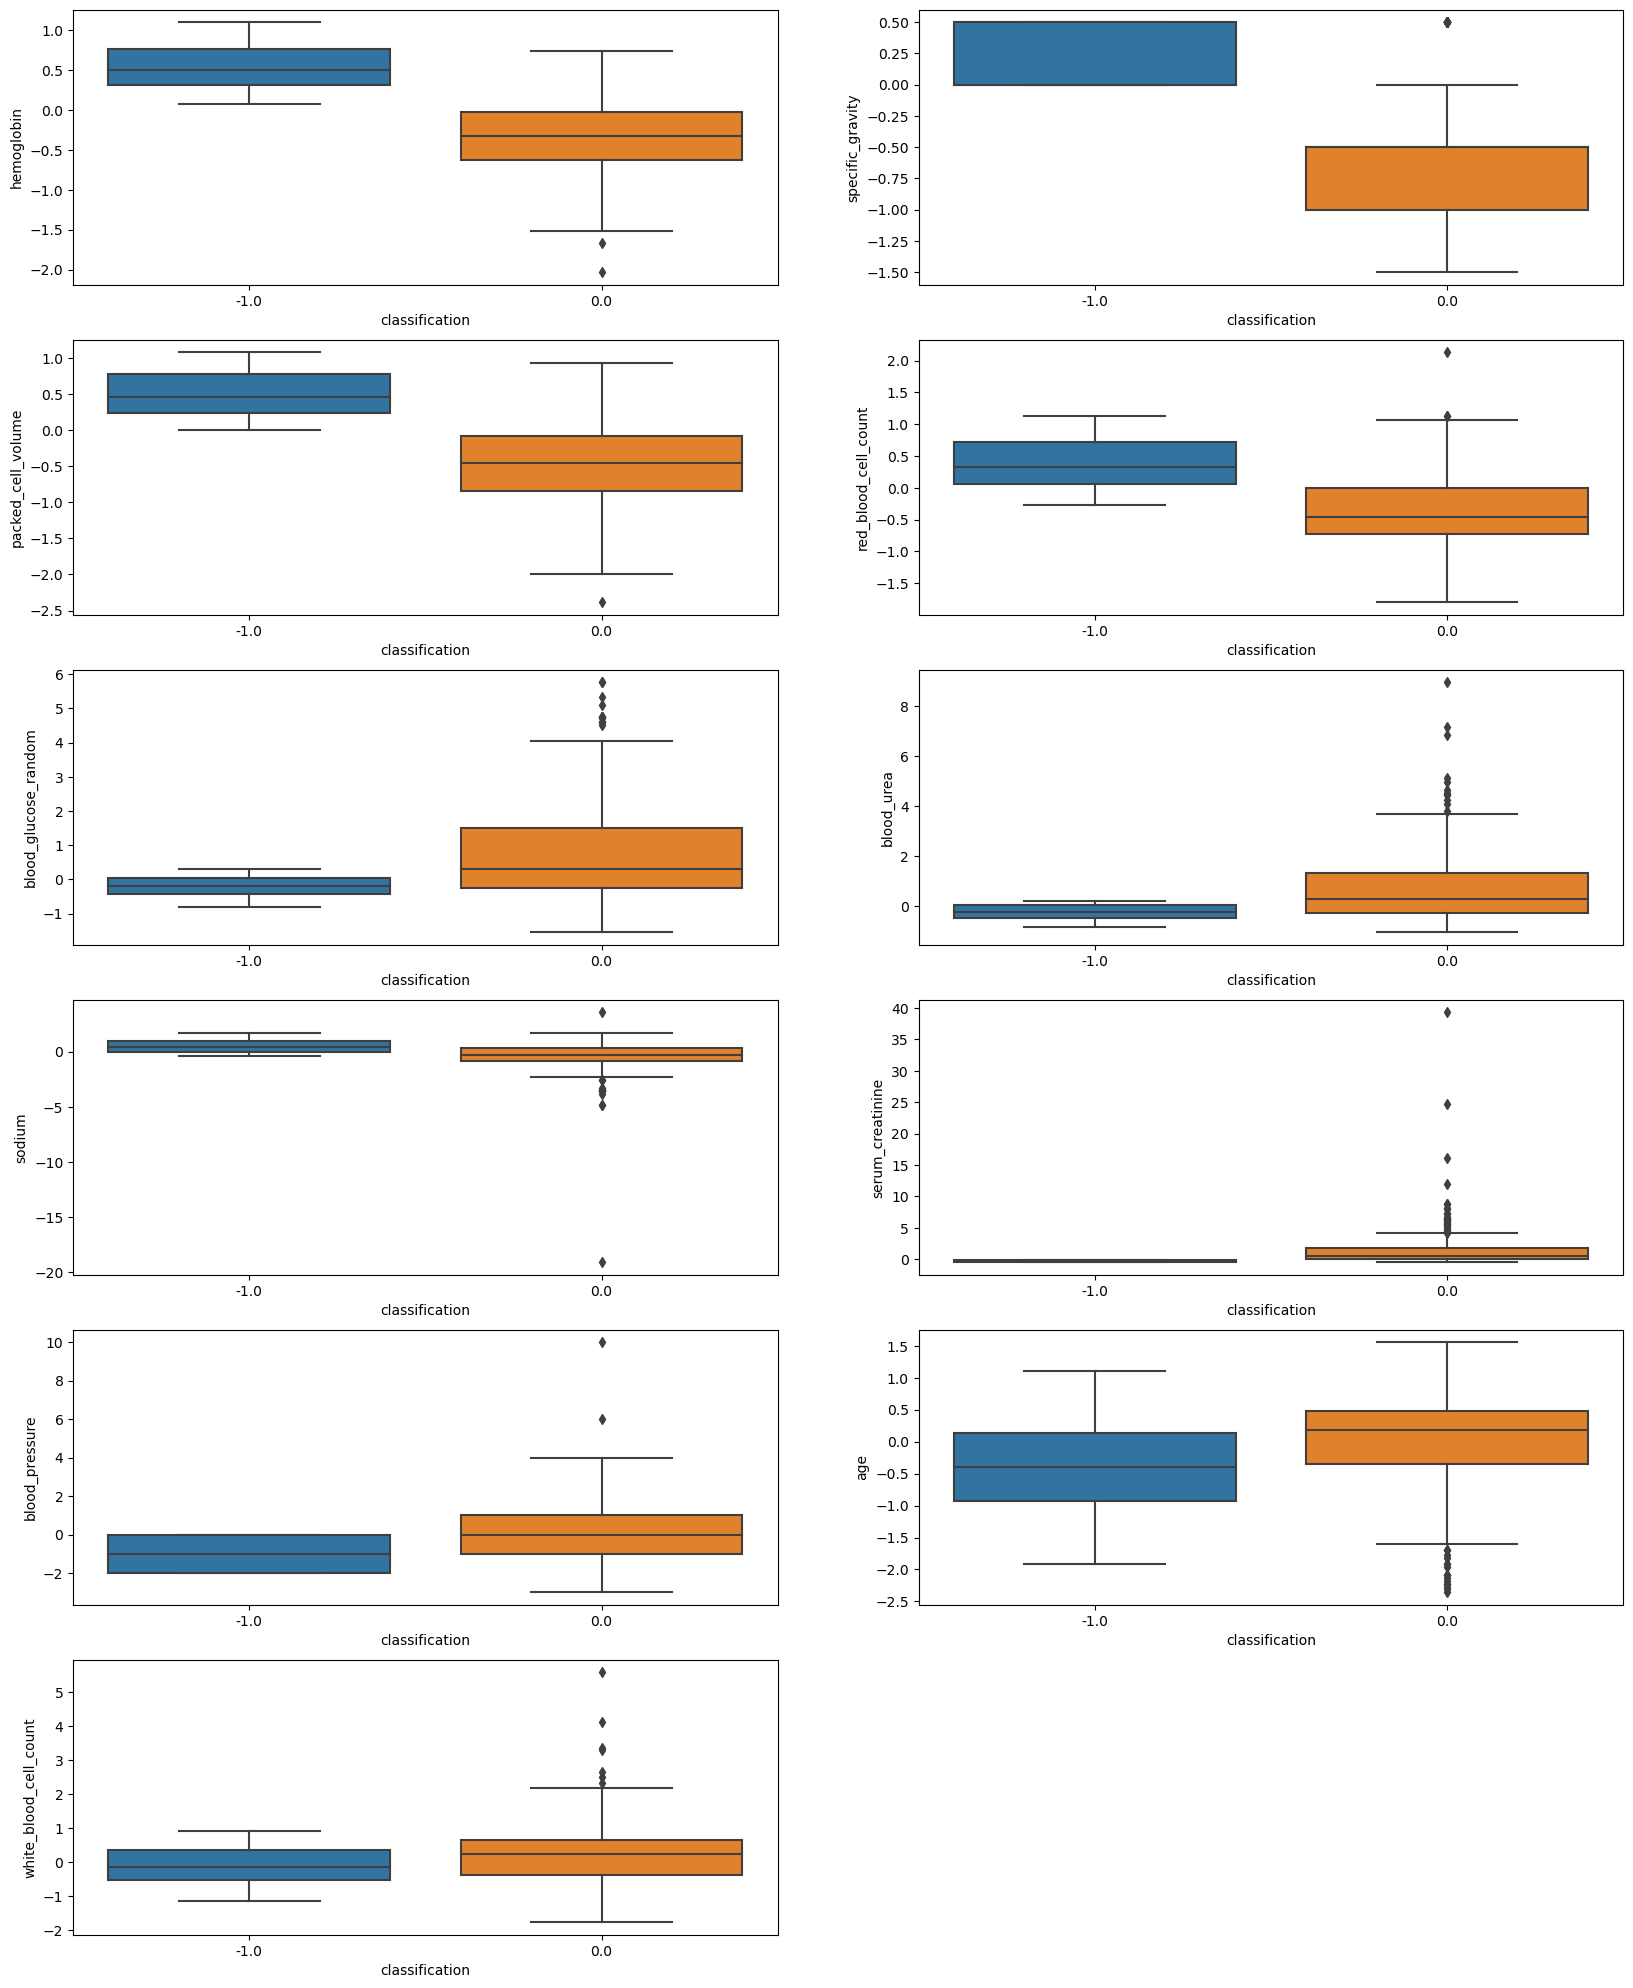

In [22]:
# Check the resultat by ploting some graphs
# for the different 3 features (hemoglobin , packed_cell_volume ,specific_gravity) high correlated with the target
# for the different 3 features (white_blood_cell_count , potassium , age) that are low correlated with the target 

plt.figure(figsize = (20, 25))
plotnumber=1

numberGrapheColumn=2
numberGrapheLigne =numberOfLigne(len(important_num_features),numberGrapheColumn)

for feature in important_num_features:
    ax = plt.subplot(numberGrapheLigne, numberGrapheColumn, plotnumber)
    sns.boxplot(x=target, y=feature, data=clean_df)
    plotnumber+=1

plt.show()

# Can confirm the resultats by the graphs

### Correlation between numerical features (Pearson)

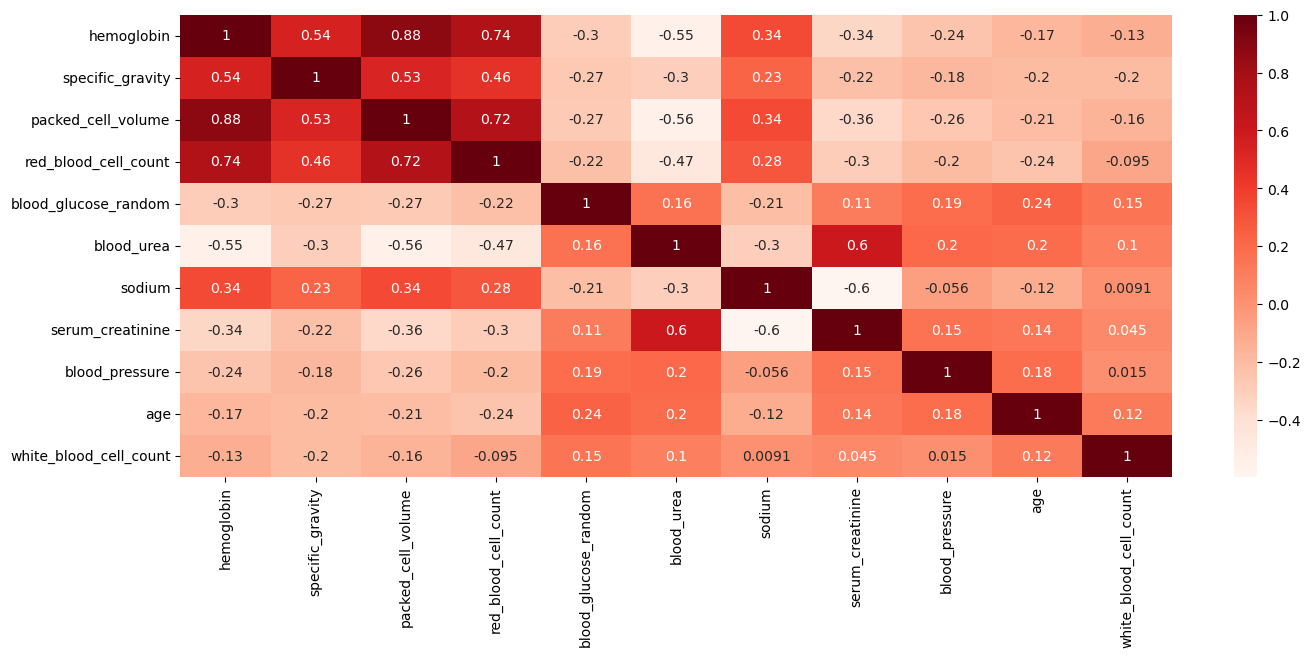

In [23]:
corr=clean_df[important_num_features].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [24]:
mask = (abs(corr) > correlation_numfeature_numfeature) & (abs(corr) <1)

strongly_correlated_features,selected_pairs=detect_correlated_feature_feature(mask,important_num_features,corr)


display(strongly_correlated_features)

print(selected_pairs)


,level_0,level_1,0
0,hemoglobin,packed_cell_volume,0.875959
1,hemoglobin,red_blood_cell_count,0.736976
2,packed_cell_volume,hemoglobin,0.875959
3,packed_cell_volume,red_blood_cell_count,0.722623
4,red_blood_cell_count,hemoglobin,0.736976
5,red_blood_cell_count,packed_cell_volume,0.722623


[('hemoglobin', 'packed_cell_volume'), ('hemoglobin', 'red_blood_cell_count'), ('packed_cell_volume', 'hemoglobin'), ('packed_cell_volume', 'red_blood_cell_count'), ('red_blood_cell_count', 'hemoglobin'), ('red_blood_cell_count', 'packed_cell_volume')]


In [25]:
important_num_features

array(['hemoglobin', 'specific_gravity', 'packed_cell_volume',
       'red_blood_cell_count', 'blood_glucose_random', 'blood_urea',
       'sodium', 'serum_creatinine', 'blood_pressure', 'age',
       'white_blood_cell_count'], dtype=object)

In [26]:
if len(selected_pairs)>0:
    important_num_features,deleted_features=delete_correlated_feature(strongly_correlated_features,important_num_features)
    print(deleted_features)
    print(important_num_features)

['packed_cell_volume' 'red_blood_cell_count']
['hemoglobin' 'specific_gravity' 'blood_glucose_random' 'blood_urea'
 'sodium' 'serum_creatinine' 'blood_pressure' 'age'
 'white_blood_cell_count']


In [27]:
print('Conclusion')
if len(selected_pairs)>0:
    print('------------------------')
    print(f"feature deleted due to high correlation ",deleted_features)
    print('------------------------')
    print(f"numerical feature:",important_num_features)
else:
    print('There is no correlation')

Conclusion
------------------------
feature deleted due to high correlation  ['packed_cell_volume' 'red_blood_cell_count']
------------------------
numerical feature: ['hemoglobin' 'specific_gravity' 'blood_glucose_random' 'blood_urea'
 'sodium' 'serum_creatinine' 'blood_pressure' 'age'
 'white_blood_cell_count']


In [28]:
# Get the feature names for the high correlation pairs

selected_pairs

[('hemoglobin', 'packed_cell_volume'),
 ('hemoglobin', 'red_blood_cell_count'),
 ('packed_cell_volume', 'hemoglobin'),
 ('packed_cell_volume', 'red_blood_cell_count'),
 ('red_blood_cell_count', 'hemoglobin'),
 ('red_blood_cell_count', 'packed_cell_volume')]

In [29]:
unique_pairs_list=transform_unique_paris(selected_pairs)

print(unique_pairs_list)

[('packed_cell_volume', 'red_blood_cell_count'), ('hemoglobin', 'red_blood_cell_count'), ('hemoglobin', 'packed_cell_volume')]


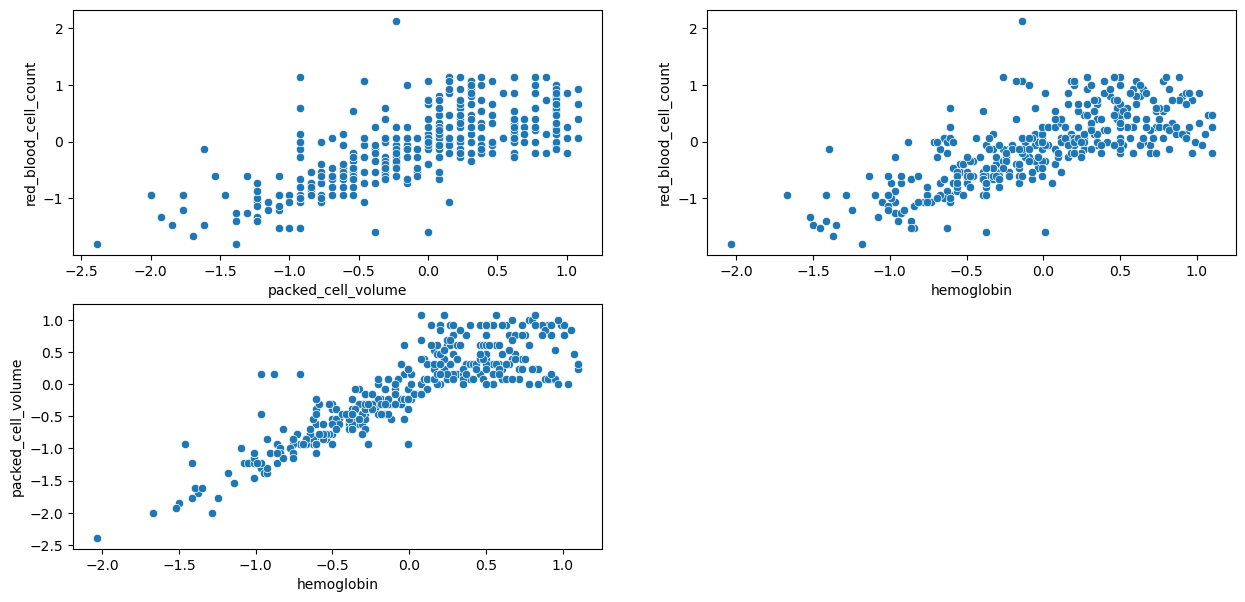

In [30]:
# Check the resultat by ploting some graph
# for the different features (hemoglobin , packed_cell_volume ,red_blood_cell_count) are correlated
# (hemoglobin , potassium , age) that are not correlated 



plt.figure(figsize = (15, 7))
plotnumber=1


numberGrapheLigne =numberOfLigne(len(unique_pairs_list),numberGrapheColumn)

for features in unique_pairs_list:
    ax = plt.subplot(numberGrapheLigne, numberGrapheColumn, plotnumber)
    sns.scatterplot(data=clean_df, x=features[0],y=features[1])
    plotnumber+=1

plt.show()


# Can confirm the resultats by the graphs

### Correlation between categorical features and the categorical target

In [31]:
def carmerV(clean_df,col1,col2):
    contingency_table = pd.crosstab(clean_df[col1], clean_df[col2])
    

    # Calculate Cramér's V
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    V = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    
    return V

In [32]:
corr=[]
for col in cat_features:
    V=carmerV(clean_df,col,target)
    corr.append([col,V])
    

corr=pd.DataFrame(corr,columns=['cat_feature','correlation with the target'])

corr.sort_values(by='correlation with the target'  ,ascending=False)

,cat_feature,correlation with the target
0,albumin,0.671226
6,hypertension,0.583668
7,diabetes_mellitus,0.552043
2,red_blood_cells,0.514877
3,pus_cell,0.399492
9,appetite,0.384175
10,peda_edema,0.365615
1,sugar,0.342412
11,aanemia,0.314596
4,pus_cell_clumps,0.252282


In [33]:
features=corr[corr['correlation with the target']>correlation_target_catfeature].sort_values(by='correlation with the target'  ,ascending=False)


important_cat_features=  features['cat_feature'].values.copy() 

important_cat_features

array(['albumin', 'hypertension', 'diabetes_mellitus', 'red_blood_cells',
       'pus_cell', 'appetite', 'peda_edema', 'sugar', 'aanemia',
       'pus_cell_clumps', 'coronary_artery_disease'], dtype=object)

In [34]:
print('conclusion :')
print(f'Important features according to the parametres correlation_target_feature {correlation_target_catfeature}')
print('-----------------------------')
print(important_cat_features)
print('-----------------------------')
print(f'features deleted according to the parametres correlation_target_feature {correlation_target_catfeature}')
print(corr[corr['correlation with the target']<correlation_target_catfeature])


conclusion :
Important features according to the parametres correlation_target_feature 0.2
-----------------------------
['albumin' 'hypertension' 'diabetes_mellitus' 'red_blood_cells' 'pus_cell'
 'appetite' 'peda_edema' 'sugar' 'aanemia' 'pus_cell_clumps'
 'coronary_artery_disease']
-----------------------------
features deleted according to the parametres correlation_target_feature 0.2
  cat_feature  correlation with the target
5    bacteria                     0.168467


### Correlation between categorical features 

In [35]:
rows= []

for f1 in cat_features:
    col = []
    for f2 in cat_features:
        v=carmerV(clean_df,f1,f2)
        col.append(v)
    rows.append(col)
    
cramers_results = np.array(rows)
corr_cat_features = pd.DataFrame(cramers_results, columns = cat_features, index =cat_features)
corr_cat_features

,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
albumin,1.000000,0.126500,0.420760,0.563310,0.414648,0.404730,0.518309,0.413189,0.300261,0.361465,0.418722,0.277670
sugar,0.126500,1.000000,0.184361,0.205718,0.196987,0.181295,0.314507,0.510568,0.350362,0.210772,0.121860,0.093919
red_blood_cells,0.420760,0.184361,0.994167,0.247789,0.080332,0.097417,0.395176,0.322595,0.102128,0.247468,0.196762,0.105953
pus_cell,0.563310,0.205718,0.247789,0.992637,0.459734,0.280733,0.342789,0.233818,0.169064,0.245404,0.336083,0.274996
pus_cell_clumps,0.414648,0.196987,0.080332,0.459734,0.986665,0.252594,0.180573,0.148615,0.166232,0.172685,0.079615,0.156832
bacteria,0.404730,0.181295,0.097417,0.280733,0.252594,0.975889,0.059463,0.046836,0.133835,0.126119,0.110027,0.000000
hypertension,0.518309,0.314507,0.395176,0.342789,0.180573,0.059463,0.994609,0.601325,0.312586,0.335348,0.361415,0.337264
diabetes_mellitus,0.413189,0.510568,0.322595,0.233818,0.148615,0.046836,0.601325,0.994435,0.257217,0.315046,0.297941,0.169264
coronary_artery_disease,0.300261,0.350362,0.102128,0.169064,0.166232,0.133835,0.312586,0.257217,0.983887,0.136256,0.153073,0.000000
appetite,0.361465,0.210772,0.247468,0.245404,0.172685,0.126119,0.335348,0.315046,0.136256,0.992311,0.406598,0.241431


In [36]:
important_cat_features

array(['albumin', 'hypertension', 'diabetes_mellitus', 'red_blood_cells',
       'pus_cell', 'appetite', 'peda_edema', 'sugar', 'aanemia',
       'pus_cell_clumps', 'coronary_artery_disease'], dtype=object)

In [37]:
mask = (corr_cat_features > correlation_catfeature_catfeature) & (corr_cat_features <0.97)
mask

strongly_correlated_features, selected_pairs=detect_correlated_feature_feature(mask,important_cat_features,corr_cat_features)

display(strongly_correlated_features)

print(selected_pairs)

,level_0,level_1,0


[]


In [38]:
if len(selected_pairs)>0:
    important_cat_features,deleted_features=delete_correlated_feature(strongly_correlated_features,important_cat_features)
    
    print(important_cat_features)
    
    print(deleted_features)

In [39]:
print('Conclusion')
if len(selected_pairs)>0:
    print('------------------------')
    print(f"feature deleted due to high correlation ",deleted_features)
    print('------------------------')
    print(f"numerical feature:",important_cat_features)
else:
    print('There is no correlation')

Conclusion
There is no correlation


In [40]:
if len(selected_pairs)>0:
    
    unique_pairs_list=transform_unique_paris(selected_pairs)

    print(unique_pairs_list)

    plt.figure(figsize = (15, 7))
    plotnumber=1


    numberGrapheLigne =numberOfLigne(len(unique_pairs_list),numberGrapheColumn)

    for features in unique_pairs_list:
        ax = plt.subplot(numberGrapheLigne, numberGrapheColumn, plotnumber)
        sns.scatterplot(data=clean_df, x=features[0],y=features[1])
        plotnumber+=1

    plt.show()



### Correlation between categorical features and num features  

 hemoglobin and albumin: F-score = 38.85868348369524, p-value = 2.0411419875927872e-32
 specific_gravity and albumin: F-score = 27.090075861144154, p-value = 1.4548835996923894e-23
 blood_glucose_random and albumin: F-score = 7.491732527986086, p-value = 9.861867703873317e-07
 blood_urea and albumin: F-score = 24.331519673093332, p-value = 2.3416165630759496e-21
 sodium and albumin: F-score = 4.913259873596254, p-value = 0.00022483634576185455
 serum_creatinine and albumin: F-score = 6.328668607341795, p-value = 1.1482732142980293e-05
 blood_pressure and albumin: F-score = 2.979499805965499, p-value = 0.011829701106094475
 age and albumin: F-score = 4.1113482053294215, p-value = 0.0011894965099594002
 white_blood_cell_count and albumin: F-score = 7.855104993266517, p-value = 4.581439669250516e-07
 hemoglobin and hypertension: F-score = 181.5289778328964, p-value = 2.3780261715997657e-34
 specific_gravity and hypertension: F-score = 77.42681219854795, p-value = 4.241209095723944e-17
 bl

 serum_creatinine and coronary_artery_disease: F-score = 15.472883520224897, p-value = 9.873746757745145e-05
 age and coronary_artery_disease: F-score = 22.652304445328365, p-value = 2.7213935301831246e-06


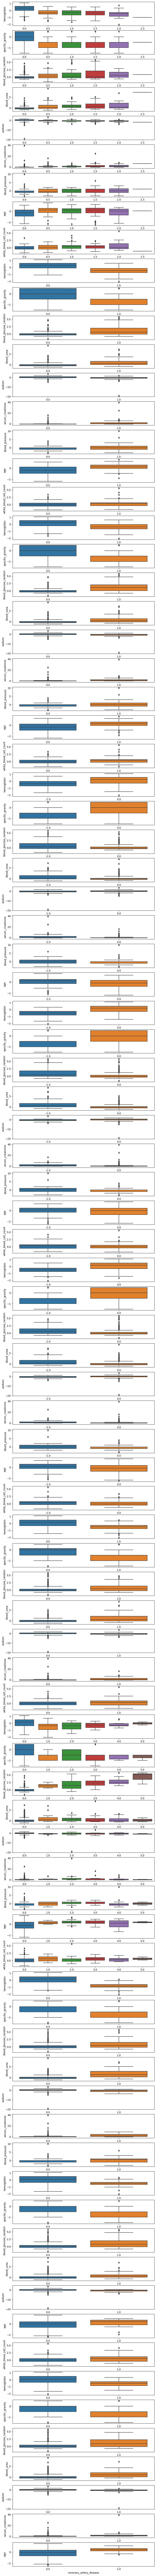

In [41]:
from sklearn.feature_selection import f_classif



plt.figure(figsize = (10,200))
plotnumber=1


for cat_feature in  important_cat_features:
    f_scores, p_values = f_classif(clean_df[important_num_features],clean_df[cat_feature])
    
    # Print the results for the current target variable
    for j, feature in enumerate(important_num_features):
        if p_values[j]<0.05 :
            print(f" {feature} and {cat_feature}: F-score = {f_scores[j]}, p-value = {p_values[j]}")
            ax = plt.subplot(len(important_cat_features)*len(important_num_features), 1, plotnumber)
            sns.boxplot(x=cat_feature, y=feature, data=clean_df)
            plotnumber+=1
plt.show()

### Store the important features into json file

In [42]:
# write the list of feature into an josn file 
import json

important_features = np.concatenate((important_num_features, important_cat_features), axis=0).tolist()
print(important_features)
# Open the file in write mode
with open('important_features.json', 'w') as file:
    # Write the array to the file in JSON format
    json.dump(important_features, file)

['hemoglobin', 'specific_gravity', 'blood_glucose_random', 'blood_urea', 'sodium', 'serum_creatinine', 'blood_pressure', 'age', 'white_blood_cell_count', 'albumin', 'hypertension', 'diabetes_mellitus', 'red_blood_cells', 'pus_cell', 'appetite', 'peda_edema', 'sugar', 'aanemia', 'pus_cell_clumps', 'coronary_artery_disease']


In [43]:
df_important_features = clean_df[important_features]
df_important_features.to_csv('Data/feat_selec_dataset.csv', index=False)

## Feature importance using tree model

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,
                                  random_state=0)

rf.fit(clean_df[all_features], clean_df[target])

feature_importances = rf.feature_importances_

feature_importances

array([0.06646094, 0.00380369, 0.02787911, 0.00568752, 0.00032413,
       0.        , 0.03730063, 0.03835642, 0.00026802, 0.00960286,
       0.00644645, 0.00049097, 0.00526734, 0.01747449, 0.16444865,
       0.042495  , 0.02244005, 0.13656196, 0.01260054, 0.00395444,
       0.21435448, 0.12092874, 0.00453513, 0.05831844])

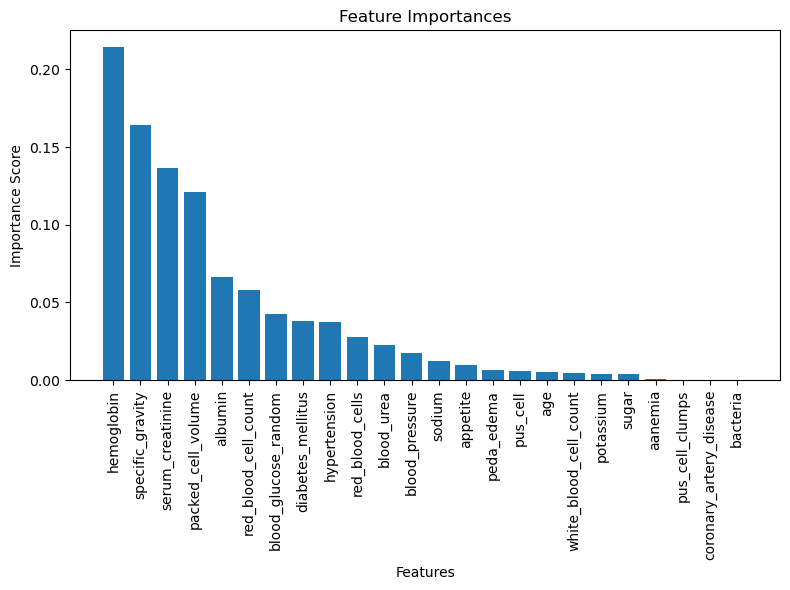

In [45]:
indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[indices]
sorted_feature_names = [all_features[i] for i in indices]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

## Feature importance using Permutation Importance

In [46]:
import eli5
from eli5.sklearn import PermutationImportance



train_X, val_X, train_y, val_y = train_test_split(clean_df[all_features], clean_df[target], random_state=1)
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)


perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1760 ± 0.0392,specific_gravity
0.1480 ± 0.0543,hemoglobin
0 ± 0.0000,blood_pressure
0 ± 0.0000,pus_cell_clumps
0 ± 0.0000,bacteria
0 ± 0.0000,coronary_artery_disease
0 ± 0.0000,peda_edema
0 ± 0.0000,sugar
0 ± 0.0000,age
0 ± 0.0000,aanemia


## Feature importance using  Coefficients in  Logistic Regression

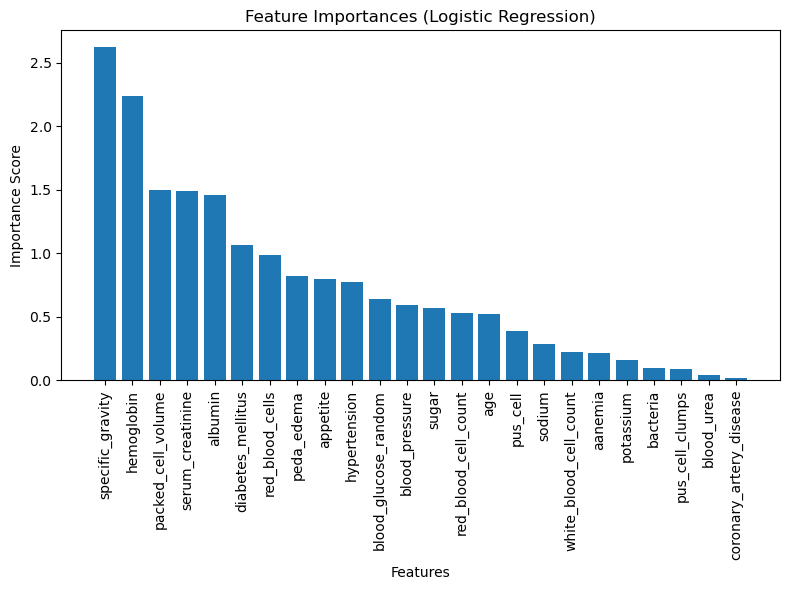

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(clean_df[all_features], clean_df[target])

coefficients = logreg.coef_[0]

# Get the absolute feature importance
feature_importances = np.abs(coefficients)

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), [clean_df[all_features].columns[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances (Logistic Regression)')
plt.tight_layout()
plt.show()

## Represent the data in other format and check if it improve the resultat of the machine learning algorthms 

### PCA representation

In [48]:
from sklearn.decomposition import PCA

pca= PCA (n_components=0.99,whiten=True)

pca_data=pca.fit_transform(clean_df)
variance_explained =pca.explained_variance_ratio_
print('The variance added by each component')
print(variance_explained)
print('number of PCA is ',len(variance_explained))

The variance added by each component
[0.39978913 0.2181197  0.10492886 0.05885468 0.0496119  0.03644157
 0.02380386 0.01884566 0.01802702 0.01362786 0.01015668 0.0074316
 0.00621427 0.00520851 0.00454055 0.00430444 0.00348014 0.00308663
 0.00291227 0.00252272]
number of PCA is  20


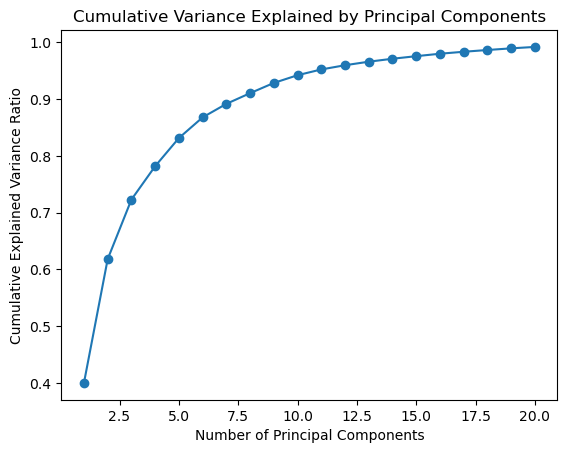

In [49]:
cumulative_variance_ratio = np.cumsum(variance_explained)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

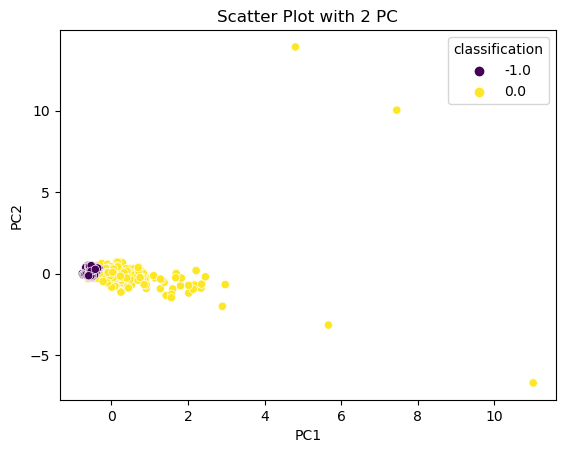

In [50]:
scatter = sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clean_df[target], palette='viridis')

# Manually set the legend labels
scatter.legend_.set_title('classification')
scatter.legend_.texts = ['ckd', 'notckd']

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot with 2 PC')
plt.show()

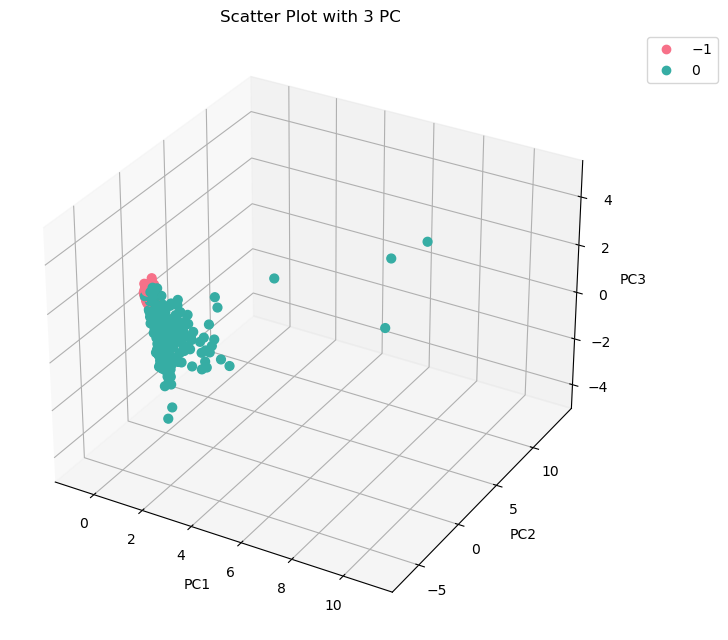

In [51]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 2).as_hex())

# plot
sc = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], s=40, c=clean_df[target], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Scatter Plot with 3 PC')


# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [52]:
name_columns_pc = [f'PC{i}' for i in range(1, len(variance_explained) + 1)]
name_columns_pc

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20']

In [53]:
df_pca = pd.DataFrame(data=pca_data,columns=name_columns_pc)
df_pca=pd.concat((df_pca, clean_df[target]), axis=1)
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,classification
0,-0.373600,-0.241645,0.067196,0.205712,0.304188,0.777975,0.273515,-0.272083,-0.292027,-0.024574,...,-0.204521,-1.431003,0.805550,-2.411891,-0.337909,-0.910016,0.579531,-0.948742,0.064960,0.0
1,-0.515406,-0.151672,0.881143,-1.256883,-1.380576,0.673467,-0.316291,2.793033,1.013235,-0.508394,...,1.191705,0.119783,-0.419029,-1.860057,-0.751951,2.394960,-0.884056,0.238729,-0.876253,0.0
2,0.163732,-0.083756,-2.514970,-1.969030,0.760031,0.493255,-1.124539,0.321988,-0.387886,0.884466,...,-0.582773,1.212003,1.283005,0.244560,2.280574,3.207646,1.494200,-0.547628,-1.485327,0.0
3,0.248105,-1.139862,-0.198530,-0.490118,-1.632745,2.987169,0.540184,0.670336,0.107374,-0.558323,...,0.550083,1.908399,2.298709,0.774506,0.747248,-0.428692,2.944679,1.611679,1.006514,0.0
4,-0.323618,-0.047202,0.085891,0.505029,-0.073621,0.583335,0.405889,0.445040,0.987171,-0.140724,...,-1.014441,1.607128,0.313463,-0.885792,0.584411,1.443589,-0.990366,0.355542,-0.347261,0.0


In [54]:
# Saved it to excel file 
df_pca.to_csv('Data/pca_dataset.csv', index=False)

### LDA representation

In [55]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
X_lda=lda.fit_transform(clean_df[all_features], clean_df[target])

X_lda.size

400

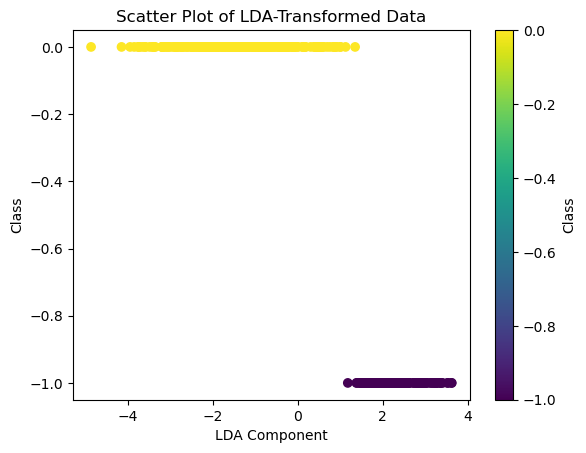

In [56]:
plt.scatter(X_lda, clean_df[target], c=clean_df[target], cmap='viridis')
plt.xlabel('LDA Component')
plt.ylabel('Class')
plt.title('Scatter Plot of LDA-Transformed Data')
plt.colorbar(label='Class')
plt.show()

In [57]:
name_columns_lda = [f'LDA{i}' for i in range(1, len(lda.explained_variance_ratio_) + 1)]
name_columns_lda

['LDA1']

In [58]:
df_lda = pd.DataFrame(data=X_lda,columns=name_columns_lda)
df_lda=pd.concat((df_lda, clean_df[target]), axis=1)
df_lda.head()

,LDA1,classification
0,0.867153,0.0
1,-0.493343,0.0
2,-2.742703,0.0
3,-2.809324,0.0
4,-1.247002,0.0


In [59]:
# Saved it to excel file 
df_lda.to_csv('Data/lda_dataset.csv', index=False)